# Linear Regression Performance Model

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.svm import SVR


In [6]:
# Reading in feature enhanced data
training = pd.read_csv('./datasets/training_enhanced.csv')
test = pd.read_csv('./datasets/test_enhanced.csv')

In [7]:
features = [#'all_sf',
            'overall_qual',  
            'exter_qual',
            'all_flr_sf', 
            #'gr_liv_area',
            'neighborhood',
            'kitchen_qual',
            #'garage_cars',
            'total_bsmt_sf', 
            #'1st_flr_sf',
            'garage_area',
            #'total_bath', 
            'year_built',
            'year_remod/add',
            'full_bath',
            #'totrms_abvgrd',
            'mas_vnr_area',
            'fireplaces', 
            'heating_qc',
            'bsmtfin_sf_1',
            #'open_porch_sf',
            'lot_area',
            'lot_frontage',
            #'central_air'
]

In [8]:
X = training[features]
y = training['saleprice']
test = test[features]

## Linear Regression Pipeline and Gridsearch

In [24]:
lr_pipe = make_pipeline(StandardScaler(), 
                        PolynomialFeatures(), 
                        SelectKBest(), 
                        LinearRegression())


In [25]:
lr_params = {
    'selectkbest__k': range(30, 200),
    'linearregression__fit_intercept': [True, False],
          }

In [26]:
lr_gs = GridSearchCV(lr_pipe, lr_params, n_jobs=-1)

In [27]:
lr_gs.fit(X, y)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest', SelectKBest()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'selectkbest__k': range(30, 200)})

Linear Regression Training Score 0.9331952235319438
Linear Regression RMSE Training 19847.585593796248
{'linearregression__fit_intercept': True, 'selectkbest__k': 139}


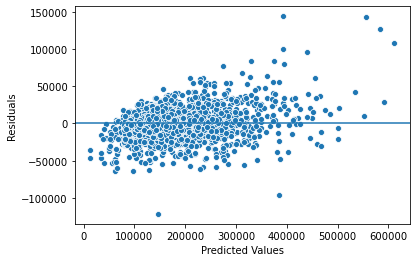

In [28]:
# Scoring the model
print('Linear Regression Training Score', lr_gs.score(X, y))
print('Linear Regression RMSE Training', mean_squared_error(y, lr_gs.predict(X), squared=False))
print(lr_gs.best_params_)


preds = lr_gs.predict(X)
lr_resids = np.array(y) - preds
sns.scatterplot(x=y, y=lr_resids)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline();

<AxesSubplot:>

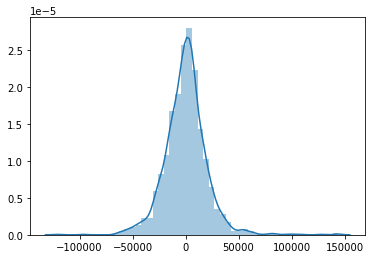

In [29]:
sns.distplot(lr_resids)

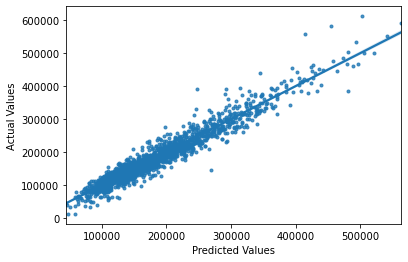

In [30]:
sns.regplot(x=preds, y=y, marker='.')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [31]:
# Creating predictions CSV
test_preds = lr_gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
submission= pd.DataFrame(test_preds, index=test1['Id'])
submission.columns = ['saleprice']

In [32]:
#Exporting predictions CSV
submission.to_csv('./datasets/2_lr_submission.csv')